In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cudf

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [11]:
class config:
    data_path = '../data/'
    local_validation = True
    validation_path = '../data/local_validation/'
    train_file = 'train.parquet'
    test_file = 'test.parquet'
    test_labels_file = 'test_labels.parquet'
    n_session_samples = 100
    n_most_common = 50
    debug = False

In [12]:
VER = 6

DISK_PIECES = 4

# LOAD THREE CO-VISITATION MATRICES
def pqt_to_dict(df):
    return df.groupby('aid_x').aid_y.apply(list).to_dict()

cd_top_20_clicks = pqt_to_dict( pd.read_parquet(f'top_20_clicks_v{VER}_0.pqt') )

for k in range(1, DISK_PIECES): 
    cd_top_20_clicks.update( pqt_to_dict( pd.read_parquet(f'top_20_clicks_v{VER}_{k}.pqt') ) )

cd_top_20_buys = pqt_to_dict( pd.read_parquet(f'top_15_carts_orders_v{VER}_0.pqt') )

for k in range(1, DISK_PIECES): 
    cd_top_20_buys.update( pqt_to_dict( pd.read_parquet(f'top_15_carts_orders_v{VER}_{k}.pqt') ) )

cd_top_20_buy2buy = pqt_to_dict( pd.read_parquet(f'top_15_buy2buy_v{VER}_0.pqt') )

# TOP CLICKS AND ORDERS IN TEST
# top_clicks = test_df.loc[test_df['type']==0,'aid'].value_counts().index.values[:20]
# top_orders = test_df.loc[test_df['type']==2,'aid'].value_counts().index.values[:20]

print('Here are size of our 3 co-visitation matrices:')
print( len( cd_top_20_clicks ), len( cd_top_20_buy2buy ), len( cd_top_20_buys ) )

Here are size of our 3 co-visitation matrices:
1812132 1055146 1812132


In [13]:
%%time

version = 1

top_20_clicks = pd.read_pickle(config.data_path + f'top_20_clicks_v{version}.pkl')
top_15_buys = pd.read_pickle(config.data_path + f'top_15_carts_orders_v{version}.pkl')
top_15_buy2buy = pd.read_pickle(config.data_path + f'top_15_buy2buy_v{version}.pkl')

# TOP CLICKS AND ORDERS IN TEST
# top_clicks = test.loc[test['type']==type_labels['clicks'],'aid'].value_counts().index.values[:20]
# top_orders = test.loc[test['type']==type_labels['orders'],'aid'].value_counts().index.values[:20]

# print shape of each matrix
print(len(top_20_clicks), len(top_15_buys), len(top_15_buy2buy))

1812132 1812132 1055146
CPU times: user 6.75 s, sys: 710 ms, total: 7.46 s
Wall time: 7.46 s


In [14]:
def get_differences(df, other_df):
    differences = list()
    for k in df.keys():
        if k in other_df.keys():
            difference = len([x for x in df[k] if x not in other_df[k]])
            differences.append(difference)
    return differences

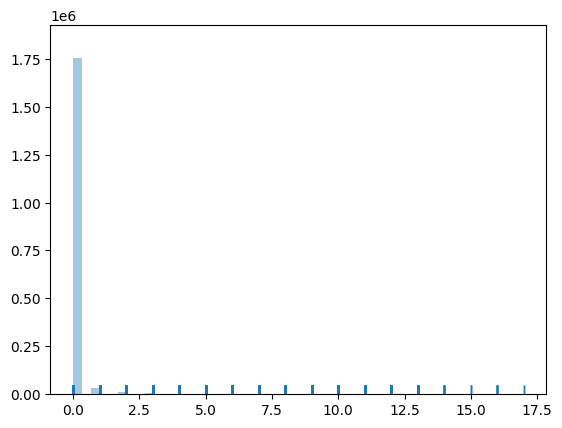

In [15]:
sns.distplot(get_differences(cd_top_20_clicks, top_20_clicks), kde=False, rug=True)

plt.show()

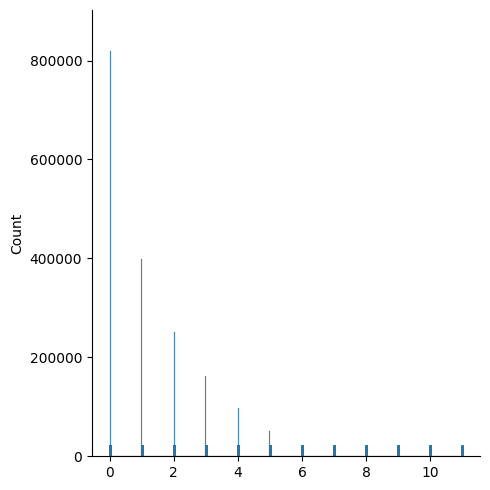

In [16]:
sns.displot(get_differences(cd_top_20_buys, top_15_buys), kde=False, rug=True)

plt.show()

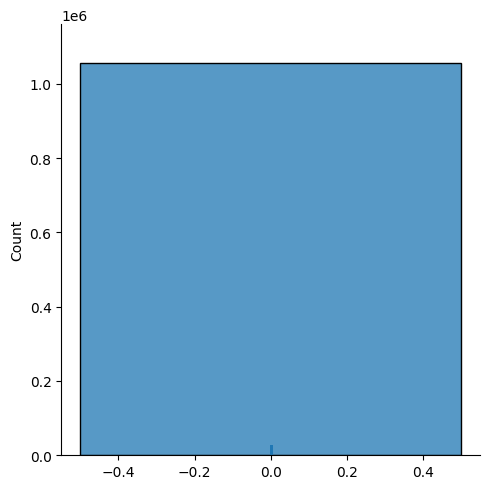

In [17]:
sns.displot(get_differences(cd_top_20_buy2buy, top_15_buy2buy), kde=False, rug=True)

plt.show()